In [2]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [98]:
data = co2 = pd.read_csv('CompleteDataset.csv')
data = data.dropna()
data = data[pd.notnull(data.Value)]
#data.to_excel("fifa.xlsx")

C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
Vm = []
Vk = []
V = []
for i in data.Value:
    if "M" in i:
        x = i.replace("€","")
        x = x.replace("M","")
        Vm.append(float(x))
            
    if "K" in i:
        x = i.replace("€","")
        x = x.replace("K","")        
        Vk.append(float(x))
        
for i in Vm:
    V.append(i*1000)
    
for i in Vk:
    V.append(i)

In [100]:
Valor = pd.Series(V)
data["Valor"] = Valor
data = data[pd.notnull(data.Valor)]
tab = data[data.Overall>85]

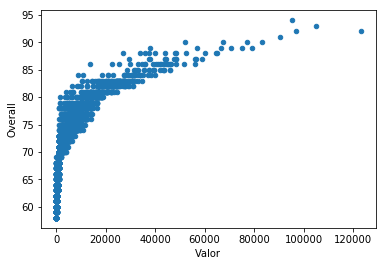

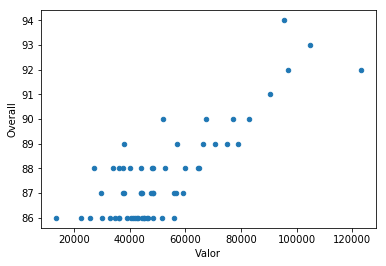

In [101]:
data.plot.scatter('Valor',"Overall");
tab.plot.scatter('Valor',"Overall");

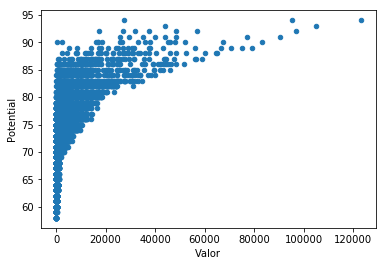

In [186]:
data.plot.scatter('Valor','Potential');
#tab.plot.scatter('Valor','Potential');

In [136]:
#data.plot.scatter('Overall','Potential');
#tab.plot.scatter('Overall','Potential');

In [163]:
#data[data.Overall == 92].sort_values(by="Valor").Valor

In [165]:
Y = data['Valor']
X = data['Potential']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Valor   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5912.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:19:28   Log-Likelihood:            -1.3706e+05
No. Observations:               13931   AIC:                         2.741e+05
Df Residuals:                   13929   BIC:                         2.741e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3.453e+04    483.323    -71.445      0.000     -3.55e+04 -3.36e+04
Potential    513.6387      6.680     76.889      0.000       500.544   526.733
==============================================================================
Omnibus:                    17717.096   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5405532.015
Skew:                           6.811   Prob(JB):                         0.00
Kurtosis:                      98.535   Cond. No.                         910.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
a =513.6387
b = -3.453e+04

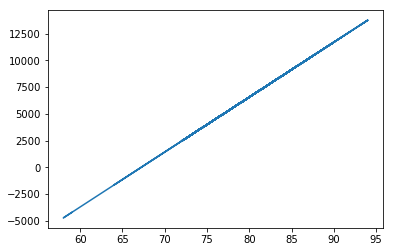

In [170]:
y = a*data.Potential + b
plt.plot(data.Potential,y)

In [185]:
dados = data[data.Overall != data.Potential]
dados
x = dados.sort_values(by="Potential").tail().Potential
residuo = []
for i in x:
    res = i-(a*i + b)
    residuo.append(res)
residuo

[-12632.760399999999,
 -12632.760399999999,
 -13145.399099999995,
 -13658.037799999998,
 -13658.037799999998]